### Prelude to Week 7: Wrap-up of last Week's Exercise 5

Before starting with today's class, here is a quick exercise for you to get feedback on the project ideas you have put together last week. You will work with another group for this one. Remember that, at any time, you can come to me and get advice. 

> _Exercise: Exchange feedback on Project ideas._
1. __Team-up__ with another group, and find a time to meet. Here is the list of group pairs that should work together:
* Group 1 and Group 2 (August, Asger and Søren?)
* Group 3 and Group 4
* Group 5 and Group 6
* Group 8 and Group 9 

> 2. One group at the time, __present__ your slide from Week 6, Exercise 5 to the other group in less than 5 minutes. Allow some time for questions at the end.
> 4. __Write down__ in your notebook (in a few lines): 
>       * Which topic is the other group going to study? 
            - Sentiment analysis on Github Issues
>       * Which questions do they aim at addressing?
            - Map the sentiment of issues based on different programming languages e.g. Are Java programmers more irritated than Python programmers.
>       * Which data will they use?
            - Github issues maybe issues from other platforms as well or Stack Overflow
> 5. __Discuss__ within your group and write in your notebook: 
>       * What is the most interesting aspect in the study designed by the other group?
            - The insights into programmer culture, since cult like cummunities can form around specific programming languages
>       * Is the data suitable to answer the questions they want to address? Why?
            - To some degree. It will give insights into knowledge sharing and issues/problem sovling on a community level. But a lot of community communication might also happen in privat chat rooms.
>       * Is it feasible to collect the data? If not, why?
            - Yes, all the data is openly accessible on the web.
>       * What are some potential limits of the data they have chosen to use for the study?
            - It might be difficult to combine data from different platforms as the user accounts are different. They probably have to categorize the data first and combine issues and data from stack overflow if they choose to use both.
            - If they only choose Github issues then the data should be okay to get and process. But, the projects they will have access to is only the public projects. So they will be able to map the open-source programming culture. However, the coorperate programmers will likely have quite a lot of private projects that will not be available. So they will most likely only get to map part of the programming culture. 
>       * Can their study questions be answered using the techniques of data visualization, network and text analyses that we have seen in class? 
            - Yes. Network and text analysis should do it and then visualizations such as word clouds or networks based on programming languages.
> 6. Share the feedback with your paired group! Remember to be caring and constructive :)

# Overview of Today's class

And now let's move to the main part of the class. The plan for today is to work on Sentiment Analysis. As usual, we will first focus a bit on the theory, and then apply what we have learnt through some exercises. Here is an overview of the programme:
> * Part 1: __Introduction to Sentiment Analysis__
> * Part 2: __Dictionary-based methods__
> * Part 3: __Wordshifts__
> * Part 4: __(dictionary & rule)-based methods__

# Part 1: Intro to Sentiment Analysis

Let's start with a short introduction to sentiment analysis. You will learn what is sentiment analysis, what we use it for, and what are the main methods for sentiment analysis. 

 
> **Video lecture**: [Intro to Sentiment Analysis](https://www.youtube.com/watch?v=QXfE0Dxb_0c&ab_channel=LauraAlessandretti)

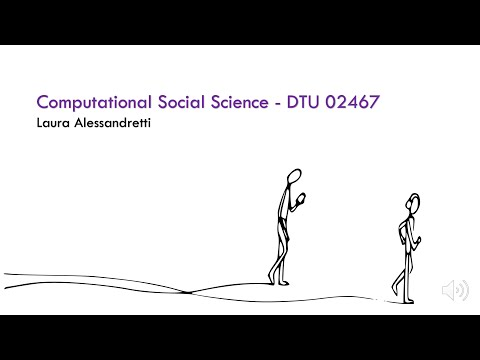

In [125]:
from IPython.display import YouTubeVideo
YouTubeVideo("QXfE0Dxb_0c",width=800, height=450)

And now let's continue with some reading. I suggest you to have a look at the paper below, where the authors show how they build the labMT dictionary for sentiment analysis and used it to study Twitter data. There is __no need for you to read it all__. Just read through the abstracts, have a look at the figures, and get a sense for the methodology.
> **Reading**: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752)

Don't forget to have a look at the interactive [Hedonometer](http://hedonometer.org/), which is built using the method described in the paper.

> _Exercise 1: Exploring the LabMT dataset_ 
>    1. Download the labMT dictionary from [here](https://hedonometer.org/words/labMT-en-v2). 
>   

2. Explain in your own words __how it was collected__. You can find the information [in the original paper, section 2.2](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752)

They analyzed Tweets from a period of 33 months containing 46 billion words from over 63 million unique users.
They chose 10.000 words from this data based on the frequency of usage and surveyed people about what sentiment they thought the words had.

> 3. Explore the labMT data. 
    * What are the top 10 words by happiness score, and the bottom 10? Does this surprise you?


In [65]:
import pandas as pd

hedonometer = pd.read_csv('Data/week7/Hedonometer.csv')

In [66]:
top = 10
print(f'Top {top} words on happiness score')
hedonometer.sort_values('Happiness Score', ascending=False).head(top)

Top 10 words on happiness score


,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
0,0,laughter,laughter,8.50,0.93
1,1,happiness,happiness,8.44,0.97
2,2,love,love,8.42,1.11
3,3,happy,happy,8.30,0.99
4,4,laughed,laughed,8.26,1.16
5,5,laugh,laugh,8.22,1.37
6,6,laughing,laughing,8.20,1.11
8,8,laughs,laughs,8.18,1.16
7,7,excellent,excellent,8.18,1.10
9,9,joy,joy,8.16,1.06


In [67]:
bottom = 10
print(f'Bottom {bottom} words on happiness score')
hedonometer.sort_values('Happiness Score').head(bottom)

Bottom 10 words on happiness score


,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
10168,10168,suicide,suicide,1.30,0.84
10169,10169,terrorist,terrorist,1.30,0.91
10171,10171,coronavirus,coronavirus,1.34,0.66
10167,10167,rape,rape,1.44,0.79
10165,10165,murder,murder,1.48,1.01
10166,10166,terrorism,terrorism,1.48,0.91
10163,10163,cancer,cancer,1.54,1.07
10164,10164,death,death,1.54,1.28
10160,10160,died,died,1.56,1.20
10161,10161,kill,kill,1.56,1.05


The words and their happiness score seems to make sense. Also, coronavirus is a bad part of many people's life, so it makes sense, that it has worked its way to the bottom of the happiness score list.

* What are the top 20 controversial words (those for which annotators' ratings disagree the most)? Why do you think they are controversial?

In [68]:
top = 20
print(f'Top {top} controversial words (words with greatest disagreement amongst annotators i.e. greatest Rating std')
hedonometer.sort_values('Standard Deviation of Ratings', ascending=False).head(top)

Top 20 controversial words (words with greatest disagreement amongst annotators i.e. greatest Rating std


,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
8389,8389,fucking,fucking,4.64,2.93
9211,9211,fuckin,fuckin,3.86,2.74
9417,9417,fucked,fucked,3.56,2.71
7990,7990,pussy,pussy,4.80,2.67
3768,3768,whiskey,whiskey,5.72,2.64
9410,9410,slut,slut,3.57,2.63
9600,9600,cigarettes,cigarettes,3.31,2.60
8991,8991,fuck,fuck,4.14,2.58
8748,8748,mortality,mortality,4.38,2.55
9715,9715,cigarette,cigarette,3.09,2.52


* Plot the histogram showing words sentiment according to the labMT data. Do you notice anything that you find surprising? Does the labMT data support the _"Pollyanna hypothesis"_ in psychology? And how? [This article](https://www.pnas.org/content/112/8/2389) is a good starting point to read about the Pollyanna hypothesis.

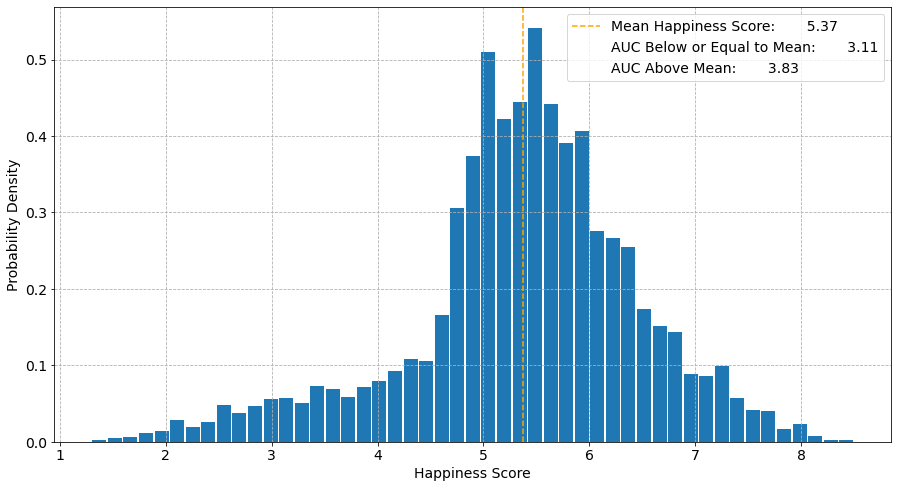

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

mpl.rc('font', **{'size': 14})

# Histogram binning
bins = np.linspace(hedonometer['Happiness Score'].min(), hedonometer['Happiness Score'].max(), 50)
width = bins[1]-bins[0]
hist, edges = np.histogram(hedonometer['Happiness Score'], bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2

# Calculate mean Happiness Score to check distribution for Pollyanna hypothesis
mean_hs = hedonometer['Happiness Score'].mean()

# Calculate below/average happiness auc and above average happiness auc
below_equal_mean = []
above_mean = []

for i in range(len(values)):
    if bins[i] > mean_hs:
        above_mean.append(values[i])
    else:
        below_equal_mean.append(values[i])

auc_below_equal_mean = sum(below_equal_mean)
auc_above_mean = sum(above_mean)

# Plot Happiness histogram
fig,ax = plt.subplots(figsize=(15,8))
ax.bar(x, hist, width=width*0.9)
plt.axvline(mean_hs, color='orange', linestyle='--', label=f'Mean Happiness Score: {mean_hs:10.2f}')
plt.grid(linestyle='--')
handles, labels = ax.get_legend_handles_labels()
handles.append(mpatches.Patch(color='none', label=f'AUC Below or Equal to Mean: {auc_below_equal_mean:10.2f}'))
handles.append(mpatches.Patch(color='none', label=f'AUC Above Mean: {auc_above_mean:10.2f}'))
plt.legend(handles=handles)

plt.xlabel('Happiness Score')
plt.ylabel('Probability Density')
plt.show()

A greater density above the mean happiness score supports the Pollyanna hypothesis of a generally more positive language use than negative language use.

>    4. Using the labMT data, create a function that, given a document (list of tokens), returns the corresponding "Happiness Score" (see equation 1 in the article). Words that do not exist in the labMT dataset can be ignored.

In [69]:
import nltk

word_happiness_score = dict(zip(hedonometer['Word'].apply(lambda w: w.lower()), hedonometer['Happiness Score']))

def happiness_score(tokens):
    return sum([word_happiness_score[t] for t in tokens if t.lower() in word_happiness_score])

# Part 2:  Dictionary-based methods.

The goal for this part of the class is to use the labMT data for studying happiness over time on _r/wallstreetbets_, building on dictionary-based methods. We will re-use some of the code from last week. So, make sure you have it at hand.

> _Exercise 2: Dictionary-based method to study sentiment on r/wallstreetbets_ 


>    1. Open the _wallstreetbets submissions dataframe_ we used in Week 6 (my version is [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz)).

In [3]:
import pandas as pd

submissions = pd.read_csv('Data/week6/wallstreet_subs.csv', parse_dates=['created_utc'], 
                            date_parser=lambda d: pd.to_datetime(d, utc=True, unit='s'))
submissions['text'] = submissions.apply(lambda row: ' '.join([row.title, row.selftext]), axis=1)

>    2. Tokenize the _text_ of each submission (use the code you created in Week 6, exercise 3, point 2). Add it in a new column of your dataframe called "tokens".

In [4]:
import nltk
from nltk.corpus import stopwords
import validators
import re
import pickle as pkl
import os

stop_words = stopwords.words('english')

def tokenize(text):
    tokens = []

    for t in nltk.tokenize.word_tokenize(text):
        if (not validators.url(t) and t not in stop_words 
            and not re.match('\d+(.\d+)?', t)):
            t = t.replace('.', '').strip().lower()
            tokens.append(t)

    return tokens 

file_path = 'Data/week7/submissions.pkl'
if os.path.isfile(file_path):
    with open(file_path, 'rb') as subs:
        submissions = pkl.load(subs)
else:
    submissions['tokens'] = submissions['text'].apply(tokenize)

>    3. Create one document per day in the dataset, containing all tokens for that day. Plot the length of the document (number of tokens) over time. Are documents long enough for using a dictionary-based method? As a rule-of-thumb  that 10,000 words are enough to score with a sentiment dictionary confidently ([Source here](https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-017-0121-9)).

In [29]:
submissions.set_index('created_utc', inplace=True)

,title,selftext,score,text,tokens
created_utc,,,,,
2019-12-31 00:00:00+00:00,4,4,4,4,4
2020-01-01 00:00:00+00:00,71,71,71,71,71
2020-01-02 00:00:00+00:00,114,114,114,114,114
2020-01-03 00:00:00+00:00,95,95,95,95,95
2020-01-04 00:00:00+00:00,19,19,19,19,19


In [61]:
docs_per_day = submissions.resample('D')['tokens'].apply(lambda x: [t for tokens in x for t in tokens])

In [62]:
doc_len_per_day = docs_per_day.apply(lambda x: len(x))

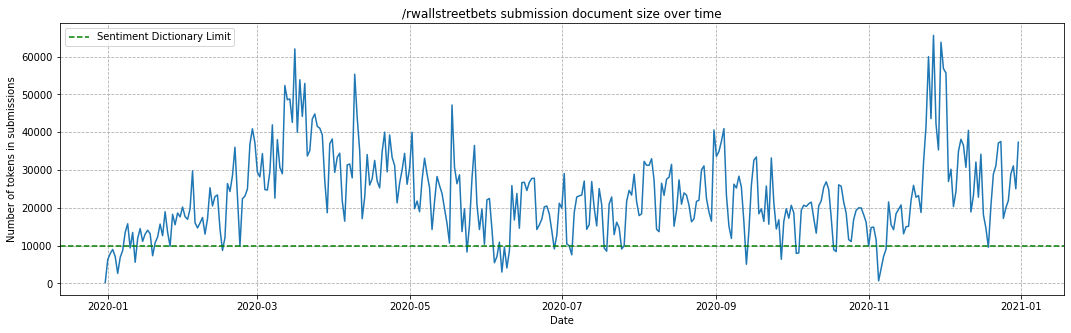

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,5))

ax.set_title('/rwallstreetbets submission document size over time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of tokens in submissions')
ax.grid(linestyle='--')
ax.plot(doc_len_per_day)
ax.axhline(10000, color='g', linestyle='--', label='Sentiment Dictionary Limit')
ax.legend()
plt.show()

From the look of the plot most days have enough tokens in the document to qualify for a Sentiment Dictionary analysis

>    4. Plot the average daily happiness on r/wallstreetbets using the function you created in step 3 (remember the video lesson in Week 2, for plotting nice time-series).

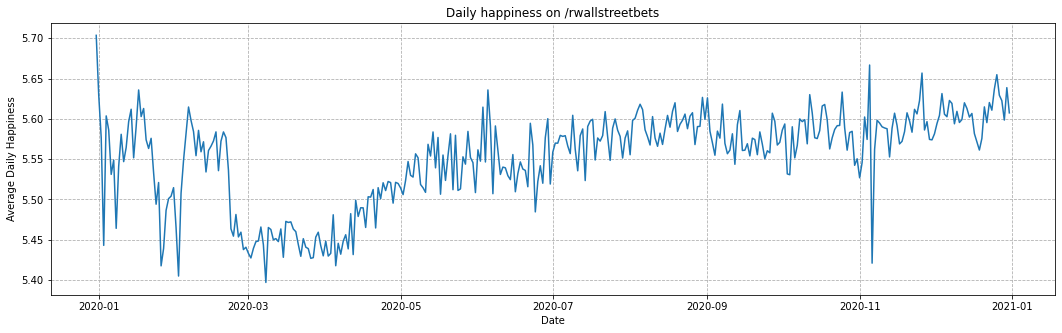

In [70]:
import matplotlib.pyplot as plt

def numof_happiness_words(doc):
    return len([t for t in doc if t.lower() in word_happiness_score])

average_daily_happiness = docs_per_day.apply(lambda doc: happiness_score(doc)/numof_happiness_words(doc))

fig, ax = plt.subplots(figsize=(18,5))
ax.set_title('Daily happiness on /rwallstreetbets')
ax.set_xlabel('Date')
ax.set_ylabel('Average Daily Happiness')
ax.grid(linestyle='--')
ax.plot(average_daily_happiness)
plt.show()

>    5. Compare happiness on _r/wallstreetbets_ to happiness on Twitter using the [hedonometer](http://hedonometer.org/timeseries/en_all/?from=2019-09-16&to=2021-03-15). What is (approximatively) the average value of the two time-series? How do you explain any difference between the two?
* The average happiness seems to be a little higher than on r/wallstreetbets maybe around 0.2-0.4 higher. But they are both in the 5 something range and therefore quite similar.
* They both share the trend of decreasing happiness around COVID-19 in march 2020.
* Which makes sense as r/wallstreetbets happiness would probably be negatively influenced due to complications on the stock market

>    6. Download the daily Close price of the [S&P 500 Index](https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC) and plot it over time. This index measures the stock performance of 500 large companies listed on stock exchanges in the United States, you can read more about it in the [S&P 500 Wikipedia page](https://en.wikipedia.org/wiki/S%26P_500).

In [118]:
import pandas as pd
import pandas_datareader as pdr

start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2021-01-25')

SP500 = pdr.get_data_yahoo('^GSPC', start, end)

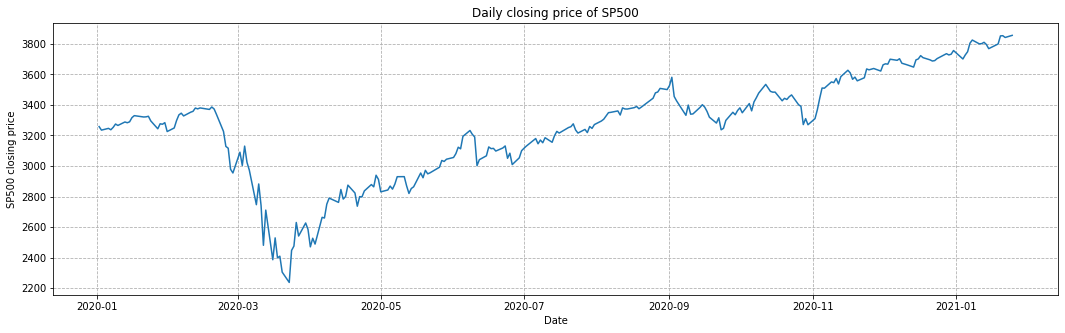

In [121]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,5))
ax.set_title('Daily closing price of SP500')
ax.set_xlabel('Date')
ax.set_ylabel('SP500 closing price')
ax.grid(linestyle='--')
ax.plot(SP500.Close)
plt.show()

>    7. Compare the figures you created in steps 8. and 10. What do you observe? 

From an eye-measure of the plots; SP500 and the average daily happiness on r/wallstreetbets seem to be fairly correlated.
They are both reacting to COVID and to an events around the protests against police brutality in the US

>    8. Discuss the limitations of your analysis. 

The analysis is only by eye from the plots and the hedonometer.

A real calculation of correlation would give a stronger idea of how the two are coupled or if they even are.

Also, the words analyzed in r/wallstreetbets need to be in the hedonometer dictionary to be accounted for in the average daily happiness. But, a reddit forum such as r/wallstreetbets have developed a sub cultural language/slang. It is highly possible that the hedonometer does not include all the lingo in the r/wallstreetbets sub reddit and therefore cannot account for a realistic happiness score
* For instance lots of emojis are used to express feelings in r/wallstreetbets

# Part 3: Word Shifts

Dictionary-based methods give us a way to measure the sentiment polarity for a given document. But which words contribute the most to make a document more sad/happy than another? We will now dig into _'Word Shifts'_, a method for understanding which words contribute to increasing or decreasing polarity.

Start by looking at the video below, where Peter Dodds, one of the authors of the Hedonometer, shows what are __Words Shift__ and how to use them.
> **Video**: [Word Shifts by Peter Dodds](https://www.youtube.com/watch?v=Z0M2k8TQ-t8&ab_channel=PeterSheridanDodds)

Now, have a look at the video lecture below, where I show how to plot WordShifts in Python. If you watch it carefullly, you will nail the next exercise ;)
> **Video Lecture**: [Word Shifts in Python](https://youtu.be/UIv5Aluo-xI)

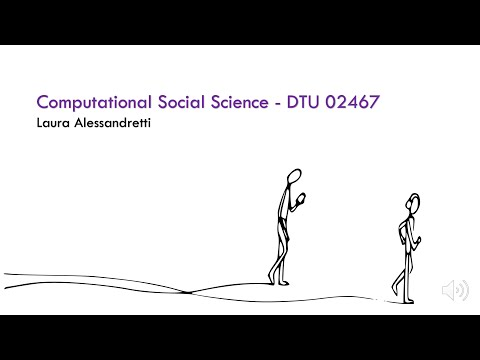

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("UIv5Aluo-xI",width=800, height=450)

_Exercise : Creating Word Shifts_

>    1. Pick a day of your choice in 2020. We call it $d$. It is more interesting if you pick a day where you expect something relevant to occur (e.g. Christmas, New Year, Corona starting, the market crashes...).

In [127]:
with open('Data/week7/submissions.pkl', 'rb') as subs:
    submissions = pkl.load(subs)
submissions.set_index('created_utc', inplace=True)

docs_per_day = submissions.resample('D')['tokens'].apply(lambda x: [t for tokens in x for t in tokens])

In [135]:
def numof_happiness_words(doc):
    return len([t for t in doc if t.lower() in word_happiness_score])

average_daily_happiness = docs_per_day.apply(lambda doc: happiness_score(doc)/numof_happiness_words(doc))

In [141]:
import datetime as dt

#Gorge Floyd Murder
d = pd.to_datetime('2020-05-26', utc=True)
d_min = d - dt.timedelta(days=7)

>    2. Build two lists $l$ and $l_{ref}$ containing all tokens for submissions posted on r/wallstreebets on day $d$, and in the 7 days preceding day $d$, respectively. 

In [145]:
import numpy as np

# Tokens on day d
l = docs_per_day[d]
td = dt.timedelta(days=7)
l_ref = np.concatenate(docs_per_day[(docs_per_day.index < d) & (doc_len_per_day.index > d_min)])

>    3. For each token $i$, compute the relative frequency in the two lists $l$ and $l_{ref}$. We call them $p(i,l)$ and $p(i,l_{ref})$, respectively. The relative frequency is computed as the number of times a token occurs over the total length of the document. Store the result in a dictionary.

In [151]:
from collections import Counter

p = {i[0]: i[1]/len(l) for i in Counter(l).items()}
p_ref = {i[0]: i[1]/len(l_ref) for i in Counter(l_ref).items()}

>    4. For each token $i$, compute the difference in relative frequency $\delta p(i) = p(i,l) - p(i,l_{ref})$. Store the values in a dictionary. Print the top 10 tokens (those with largest relative frequency). Do you notice anything interesting?

In [153]:
all_tokens = set(p.keys()).union(set(p_ref.keys()))

In [159]:
dp = {t: p.get(t,0)-p_ref.get(t,0) for t in all_tokens}
sorted(dp.items(), key= lambda x: x[1], reverse=True)[:10]

[('’', 0.004500974530950242),
 (':', 0.004027811686281203),
 ('', 0.0039644831715914194),
 (')', 0.002191457814445741),
 ('https', 0.002050495080845369),
 ('gold', 0.0019423641583614392),
 ('elastic', 0.001759417969837596),
 ('!', 0.0017031522484563678),
 ('(', 0.0015714455048683757),
 ('oil', 0.001217720537494945)]

>    5. Now, for each token, compute the happiness $h(i) = labMT(i) - 5$, using the labMT dictionary. Here, we subtract $5$, so that positive tokens will have a positive value and negative tokens will have a negative value. Then, compute the product $\delta \Phi = h(i)\cdot \delta p(i)$. Store the results in a dictionary. 


In [162]:
h = {t: word_happiness_score.get(t,np.nan) - 5 for t in all_tokens}

In [163]:
dphi = {t: h[t] * dp[t] for t in all_tokens if not np.isnan(h[t])}

>    6. Print the top 10 tokens, ordered by the absolute value of $|\delta \Phi|$. Explain in your own words the meaning of $\delta \Phi$. If that is unclear, have a look at [this page](https://shifterator.readthedocs.io/en/latest/cookbook/weighted_avg_shifts.html).

In [166]:
sorted(dphi.items(), key=lambda x: abs(x[1]), reverse=True)[:10]

[('gold', 0.004972452245405283),
 ('covid', -0.0023905055535442424),
 ('america', 0.0014052682202994715),
 ('money', 0.0013496489445296244),
 ('play', 0.001316552331639878),
 ('healthy', 0.0013108582523228725),
 ('i', -0.0012133546922631158),
 ('day', -0.0012052787968308463),
 ('million', -0.0011714407929148065),
 ('best', 0.0011309070567447606)]

dphi describes the token's influence on the happiness score, because it describes the happiness score of the token weighted by how the frequency of the token has changed. E.g. if the token has a positive hapiness score and the frequency of the token has increased (delta p) then the happiness score has been positively influenced by an increased use of the token word.

>    7. Now install the [``shifterator``](https://shifterator.readthedocs.io/en/latest/installation.html) Python package. We will use it for plotting Word Shifts. 

>    8. Use the function ``shifterator.WeightedAvgShift`` to plot the WordShift, showing which words contributed the most to make your day of choice _d_ happier or more sad then days in the preceding 7 days. Comment on the figure. 

/home/williammarstrand/miniconda3/envs/com_social2021/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


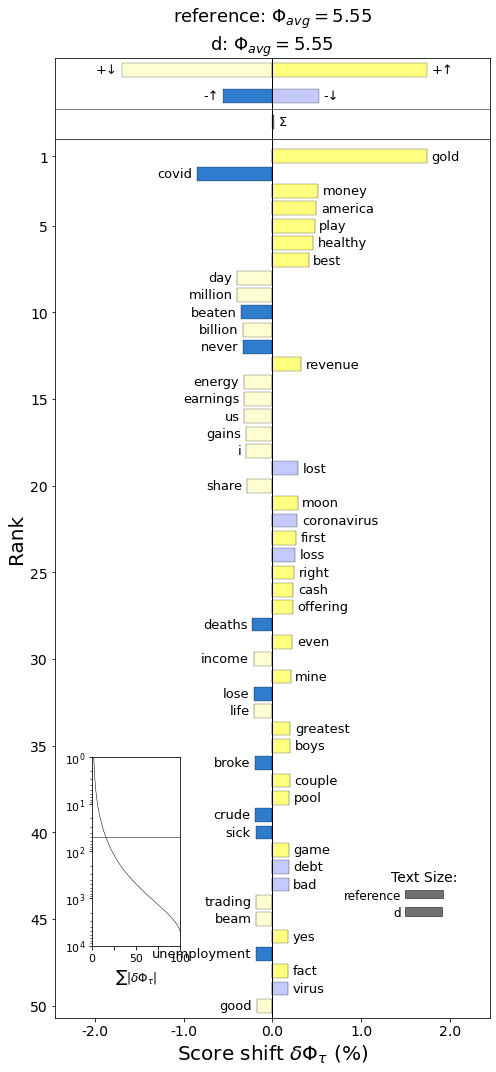

<AxesSubplot:title={'center':'reference: $\\Phi_{avg}=$5.55\nd: $\\Phi_{avg}=$5.55'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [170]:
import shifterator as sh

sentiment_sh = sh.WeightedAvgShift(type2freq_1=p_ref,
                                    type2freq_2=p,
                                    type2score_1= word_happiness_score,
                                    reference_value=5)
sentiment_sh.get_shift_graph(detailed=True,
                                system_names=['reference', 'd'])

>    9. How do words that you printed in step 6 relate to those shown by the WordShift? 

* They are in the top words
* If a word is negative in score and is a negative word it means the use of the word has increased e.g. covid is increased
* If a word is positive in score and is a positive word it means the use of the word has increased e.g. gold has increased
* Positive words with negative scores have decreased in use
* Negative words with positive scores have decreased in use

# Part 4: (dictionary & rule)-based methods

We will now explore another method for sentiment analysis, called [VADER](https://github.com/cjhutto/vaderSentiment), which uses **both** dictionary-based methods and rule-based methods. My introductory lecture above has covered the basic functioning of VADER. If you are interested in finding out more, you can find more material in the [original article](https://ojs.aaai.org/index.php/ICWSM/article/download/14550/14399).

> _Exercise 2: Using VADER to investigate polarity in r/wallstreetbets_ 

>    1. Download the VADER lexicon dictionary from [here](https://raw.githubusercontent.com/cjhutto/vaderSentiment/master/vaderSentiment/vader_lexicon.txt). Read the description of the VADER lexicon in the README file of [VADER Github repo](https://github.com/cjhutto/vaderSentiment). How was the dictionary created? 

VADER is a sentiment lexicon specifically made for sentiment analysis of social media.

It includes emojis as well and slang

It has been validate by human judges and by emperical investigation of the applicability of each feature in sentiment analysis using a wisdom-of-the-crowd approach

>    2. Explore the VADER lexicon data. 
        * What are the top 10 words by polarity. And the bottom 10? Does this surprise you?
        * Plot the distribution of polarity according to the VADER Lexicon data. What are the differences compared to the labMT data? Is it to be expected?

In [14]:
import pandas as pd

VADER = pd.read_table('Data/week7/vader.txt', delimiter='\t', header=None)
VADER.columns = ['token', 'mean-sentiment-rating', 'standard deviation', 'raw-human-sentiment-rating']

In [22]:
top = VADER.sort_values('mean-sentiment-rating', ascending=False).head(10)
top

,token,mean-sentiment-rating,standard deviation,raw-human-sentiment-rating
271,ilu,3.4,0.66332,"[3, 4, 3, 4, 2, 3, 4, 3, 4, 4]"
273,ily,3.4,0.66332,"[3, 4, 3, 4, 2, 3, 4, 3, 4, 4]"
4551,magnificently,3.4,0.66332,"[3, 3, 3, 4, 4, 2, 4, 4, 3, 4]"
207,aml,3.4,0.66332,"[4, 3, 2, 4, 3, 3, 4, 4, 3, 4]"
6553,sweetheart,3.3,1.00499,"[4, 1, 3, 4, 4, 4, 2, 3, 4, 4]"
309,lya,3.3,0.78102,"[3, 4, 4, 4, 2, 2, 3, 4, 3, 4]"
263,hearts,3.3,0.48305,"[4, 3, 3, 3, 4, 3, 3, 3, 4, 3]"
2639,euphoria,3.3,0.90000,"[4, 4, 3, 3, 3, 4, 4, 4, 1, 3]"
2476,ecstacy,3.3,1.18743,"[4, 4, 3, 4, 4, 0, 3, 3, 4, 4]"
4449,love,3.2,0.40000,"[3, 3, 3, 3, 3, 3, 3, 4, 4, 3]"


In [23]:
bottom = VADER.sort_values('mean-sentiment-rating', ascending=False)[-10:]
bottom

,token,mean-sentiment-rating,standard deviation,raw-human-sentiment-rating
3627,hell,-3.6,0.66332,"[-4, -4, -4, -4, -4, -2, -3, -4, -3, -4]"
4712,motherfucker,-3.6,0.66332,"[-3, -4, -4, -4, -4, -2, -4, -3, -4, -4]"
4262,kill,-3.7,0.45826,"[-4, -4, -4, -4, -3, -4, -4, -4, -3, -3]"
5471,rape,-3.7,0.64031,"[-4, -2, -4, -4, -4, -4, -4, -4, -3, -4]"
240,fu,-3.7,0.45826,"[-3, -4, -4, -3, -3, -4, -4, -4, -4, -4]"
4731,murder,-3.7,0.64031,"[-4, -4, -4, -4, -2, -4, -4, -4, -3, -4]"
6658,terrorist,-3.7,0.45826,"[-4, -3, -4, -4, -4, -3, -4, -4, -3, -4]"
6105,slavery,-3.8,0.40000,"[-4, -3, -4, -3, -4, -4, -4, -4, -4, -4]"
5477,raping,-3.8,0.40000,"[-3, -4, -4, -4, -4, -4, -4, -4, -3, -4]"
5478,rapist,-3.9,0.30000,"[-4, -4, -4, -4, -4, -4, -3, -4, -4, -4]"


The top and bottom 10 makes sense as the top describes general positive human emotions and the bottom regard fear, criminal actions and swearing.

>    3. Install the VADER library using ``pip install vaderSentiment``.

>    4. Go through the example sentences in the [vaderSentiment documentation page](https://github.com/cjhutto/vaderSentiment) (Section Code Examples). Compute the _compund_  polarity for each sentence. 

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)['compound']
    print("{:-<65}  \tcompound polarity score: {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.-----------------------------  	compound polarity score: 0.8316
VADER is smart, handsome, and funny!-----------------------------  	compound polarity score: 0.8439
VADER is very smart, handsome, and funny.------------------------  	compound polarity score: 0.8545
VADER is VERY SMART, handsome, and FUNNY.------------------------  	compound polarity score: 0.9227
VADER is VERY SMART, handsome, and FUNNY!!!----------------------  	compound polarity score: 0.9342
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!---------  	compound polarity score: 0.9469
VADER is not smart, handsome, nor funny.-------------------------  	compound polarity score: -0.7424
The book was good.-----------------------------------------------  	compound polarity score: 0.4404
At least it isn't a horrible book.-------------------------------  	compound polarity score: 0.431
The book was only kind of good.----------------------------------  	compound polarity score: 0.3832


>    5. Try VADER on your own sentences. Can you find a sentence where VADER gets wrong (the polarity has opposite sign compared to what one would expect)? You can have a look at VADER set of rules [here](https://ojs.aaai.org/index.php/ICWSM/article/download/14550/14399). 

In [48]:
sentences = [
    'I just love hurting people!',
    'I would love for you to shut up...',
    'If you could shut the fuck up, it would be really nice <3',
    'Yeah right, you are just soooo great all the time...'
]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)['compound']
    print("{:-<65}  \tcompound polarity score: {}".format(sentence, str(vs)))

I just love hurting people!--------------------------------------  	compound polarity score: 0.4199
I would love for you to shut up...-------------------------------  	compound polarity score: 0.6369
If you could shut the fuck up, it would be really nice <3--------  	compound polarity score: 0.4159
Yeah right, you are just soooo great all the time...-------------  	compound polarity score: 0.743


VADER has a hard time catching sarcasm

>    6. Now open the _wallstreetbets submissions dataframe__. Divide the text of each submission into sentences (you can use ``nltk.sent_tokenize``). Apply VADER to each individual sentence. Then compute the average polarity for each submission.

In [50]:
import pickle as pkl

with open('Data/week7/submissions.pkl', 'rb') as subs:
    submissions = pkl.load(subs)

submissions.head(3)

,created_utc,title,selftext,score,text,tokens
0,2020-04-06 11:50:11+00:00,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1,"What is the Fed actually buying? Okay, I may a...","[what, fed, actually, buying, ?, okay, ,, i, m..."
1,2020-04-06 11:42:00+00:00,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1,I didn’t learn about puts because I was lazy B...,"[i, ’, learn, puts, i, lazy, beginning, virus,..."
2,2020-04-06 11:41:08+00:00,HOT TAKE,Literally everyone has free time on their hand...,1,HOT TAKE Literally everyone has free time on t...,"[hot, take, literally, everyone, free, time, h..."


In [54]:
import nltk 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def compound_polarity(text):
    polarities = []
    sentences = nltk.sent_tokenize(text)
    analyzer = SentimentIntensityAnalyzer()
    for sentence in sentences:
        polarities.append(analyzer.polarity_scores(sentence)['compound'])
    
    return sum(polarities)/len(polarities)

In [55]:
submissions['avg_polarity'] = submissions['text'].apply(compound_polarity)

In [56]:
with open('Data/week7/submissions_with_polarity.pkl', 'wb') as subs:
    pkl.dump(submissions, subs)

>    7. Aggregate by day and compute the average daily compund polarity. Plot the curve over time (Optional: add error-bars using the standard deviation). Does this curve look different to the one you obtained in Part 2. How do you explain it?

In [58]:
submissions.set_index('created_utc', inplace=True)
avg_daily_polarity = submissions.resample('D')['avg_polarity'].mean()

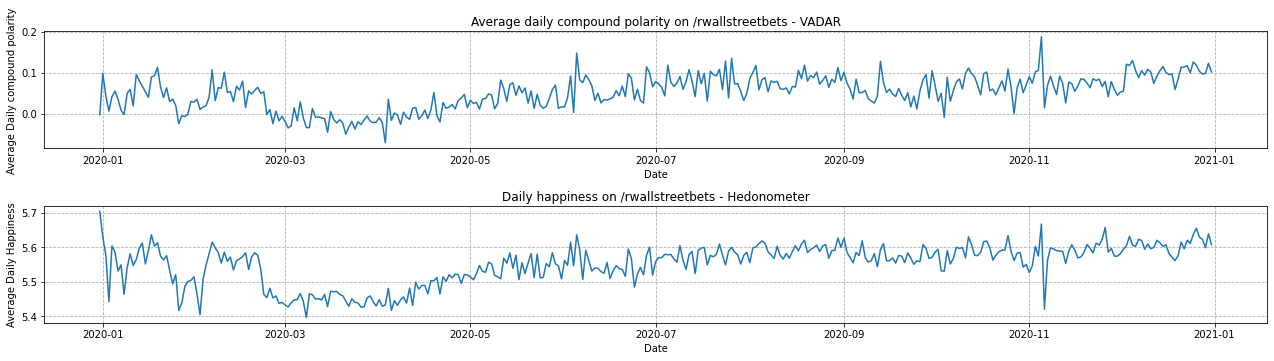

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1,figsize=(18,5))

# VADAR
ax[0].set_title('Average daily compound polarity on /rwallstreetbets - VADAR')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Average Daily compound polarity')
ax[0].grid(linestyle='--')
ax[0].plot(avg_daily_polarity)

#Hedonometer
ax[1].set_title('Daily happiness on /rwallstreetbets - Hedonometer')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Average Daily Happiness')
ax[1].grid(linestyle='--')
ax[1].plot(average_daily_happiness)

plt.tight_layout()
plt.show()

The two plots looks quite similar in the major strokes and so most of the polarity is captured equally by both of the lexicons.

How ever the plots do differ in some of the spikes. For instance just around Feburary 2020 the Hedonometer dips a little more than VADAR. The differences could be due to some extra fine tuning in the sentiment scores in the lexicons. This could be particular rules in VADAR that gives other sentiments than the word happiness score in the Hedonometer. 

Also, the lexicons probably capture slightly different tokens i.e. VADAR is particularly tuned for SoMe and for instance contiains many emojis and slang which could impact the polarity.

>    8. What is the advantage of using a rule-based method over the simple dictionary-based approach? What type of analyses could you imagine doing on the Reddit dataset using VADER that you can not do using dictionary approaches?

It is definitely an advantage that a rule based lexicon has fine tuned rules for a particular area; if the rules acutally apply.

So, if we had the resources we could probably fine tune VADAR particularly for Reddit or event better for the r/wallstreetbets specificly.

* A very straight forward analysis could be measuring the polarity based on emojis on r/wallstreetbets
* Another would be to analyze sentiment based on the use of intensifiers (really, amazingly, etc.)